# Auto ARIMA & Auto SARIMA Model

In [47]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 20 kB/s  eta 0:00:01
     |████████████████████████████████| 2.0 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
#from pandas_profiling import ProfileReport
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime, pytz
import math

In [38]:
Data=pd.read_excel("/media/sda6/Projects/Data Mining on gas Network/output.xls",dtype={'TOF':"category", 'AF':"category",
       'DS':"category", 'feeder':"category",'TOP':"category", 'Relay':"category", 'COB':"category", 'PD':"category",
       'COP':"category","DOFDB":"float64"})

In [39]:
time=list()
for i in Data['DFB']:
    i=i.split()
    yeardaymonth=i[0].split("/")
    hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
Data['DFB']=time

In [40]:
time=list()
for i in Data['CFB']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['CFB']=time

In [41]:
time=list()
for i in Data['PS']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['PS']=time

In [42]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   BN      1649 non-null   int64         
 1   TOF     1649 non-null   category      
 2   AF      1649 non-null   category      
 3   DS      1649 non-null   category      
 4   feeder  1649 non-null   category      
 5   RC      1649 non-null   float64       
 6   TOP     1649 non-null   category      
 7   Relay   1649 non-null   category      
 8   COB     1649 non-null   category      
 9   PD      858 non-null    category      
 10  COP     807 non-null    category      
 11  DFB     1649 non-null   datetime64[ns]
 12  CFB     1646 non-null   datetime64[ns]
 13  DOFDB   1649 non-null   float64       
 14  PS      812 non-null    datetime64[ns]
 15  STOLP   813 non-null    float64       
 16  EENS    1649 non-null   float64       
dtypes: category(9), datetime64[ns](3), float64(4), int64

In [22]:
Data=Data.sort_values("DFB")

In [44]:
Data

,BN,TOF,AF,DS,feeder,RC,TOP,Relay,COB,PD,COP,DFB,CFB,DOFDB,PS,STOLP,EENS
0,88644,A,A,A,A,0.177419,A,A,A,NaN,NaN,2019-03-21 06:54:00,2019-03-21 06:59:00,5.0,NaT,NaN,0.010946
1,88645,A,B,B,B,0.145161,A,A,B,B,B,2019-03-21 07:15:00,2019-03-21 07:17:00,2.0,NaT,NaN,0.003127
2,88648,A,A,C,C,0.032258,A,A,C,NaN,NaN,2019-03-21 12:03:00,2019-03-21 12:45:00,42.0,NaT,NaN,0.016419
3,88657,A,A,A,D,0.048387,A,A,D,C,C,2019-03-22 01:20:00,2019-03-22 02:25:00,65.0,2019-03-22 08:15:00,415.0,0.039093
4,88664,A,C,D,A,0.161290,A,B,E,D,D,2019-03-22 16:26:00,2019-03-22 16:50:00,24.0,2019-03-22 22:00:00,334.0,0.075059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,96326,A,L,BB,G,0.096774,A,A,F,C,C,2020-03-19 10:21:00,2020-03-19 10:30:00,9.0,2020-03-19 10:40:00,19.0,0.017201
1645,96335,A,C,E,C,0.193548,A,A,I,NaN,NaN,2020-03-19 13:23:00,2020-03-19 14:15:00,52.0,2020-03-19 13:34:00,11.0,0.025020
1646,96346,A,H,M,E,0.274194,A,A,R,NaN,NaN,2020-03-19 18:28:00,2020-03-19 19:07:00,39.0,2020-03-19 19:52:00,84.0,0.193120
1647,96347,A,H,X,C,0.258065,A,A,X,NaN,NaN,2020-03-19 19:08:00,2020-03-19 19:10:00,2.0,NaT,NaN,0.006255


## Model Building

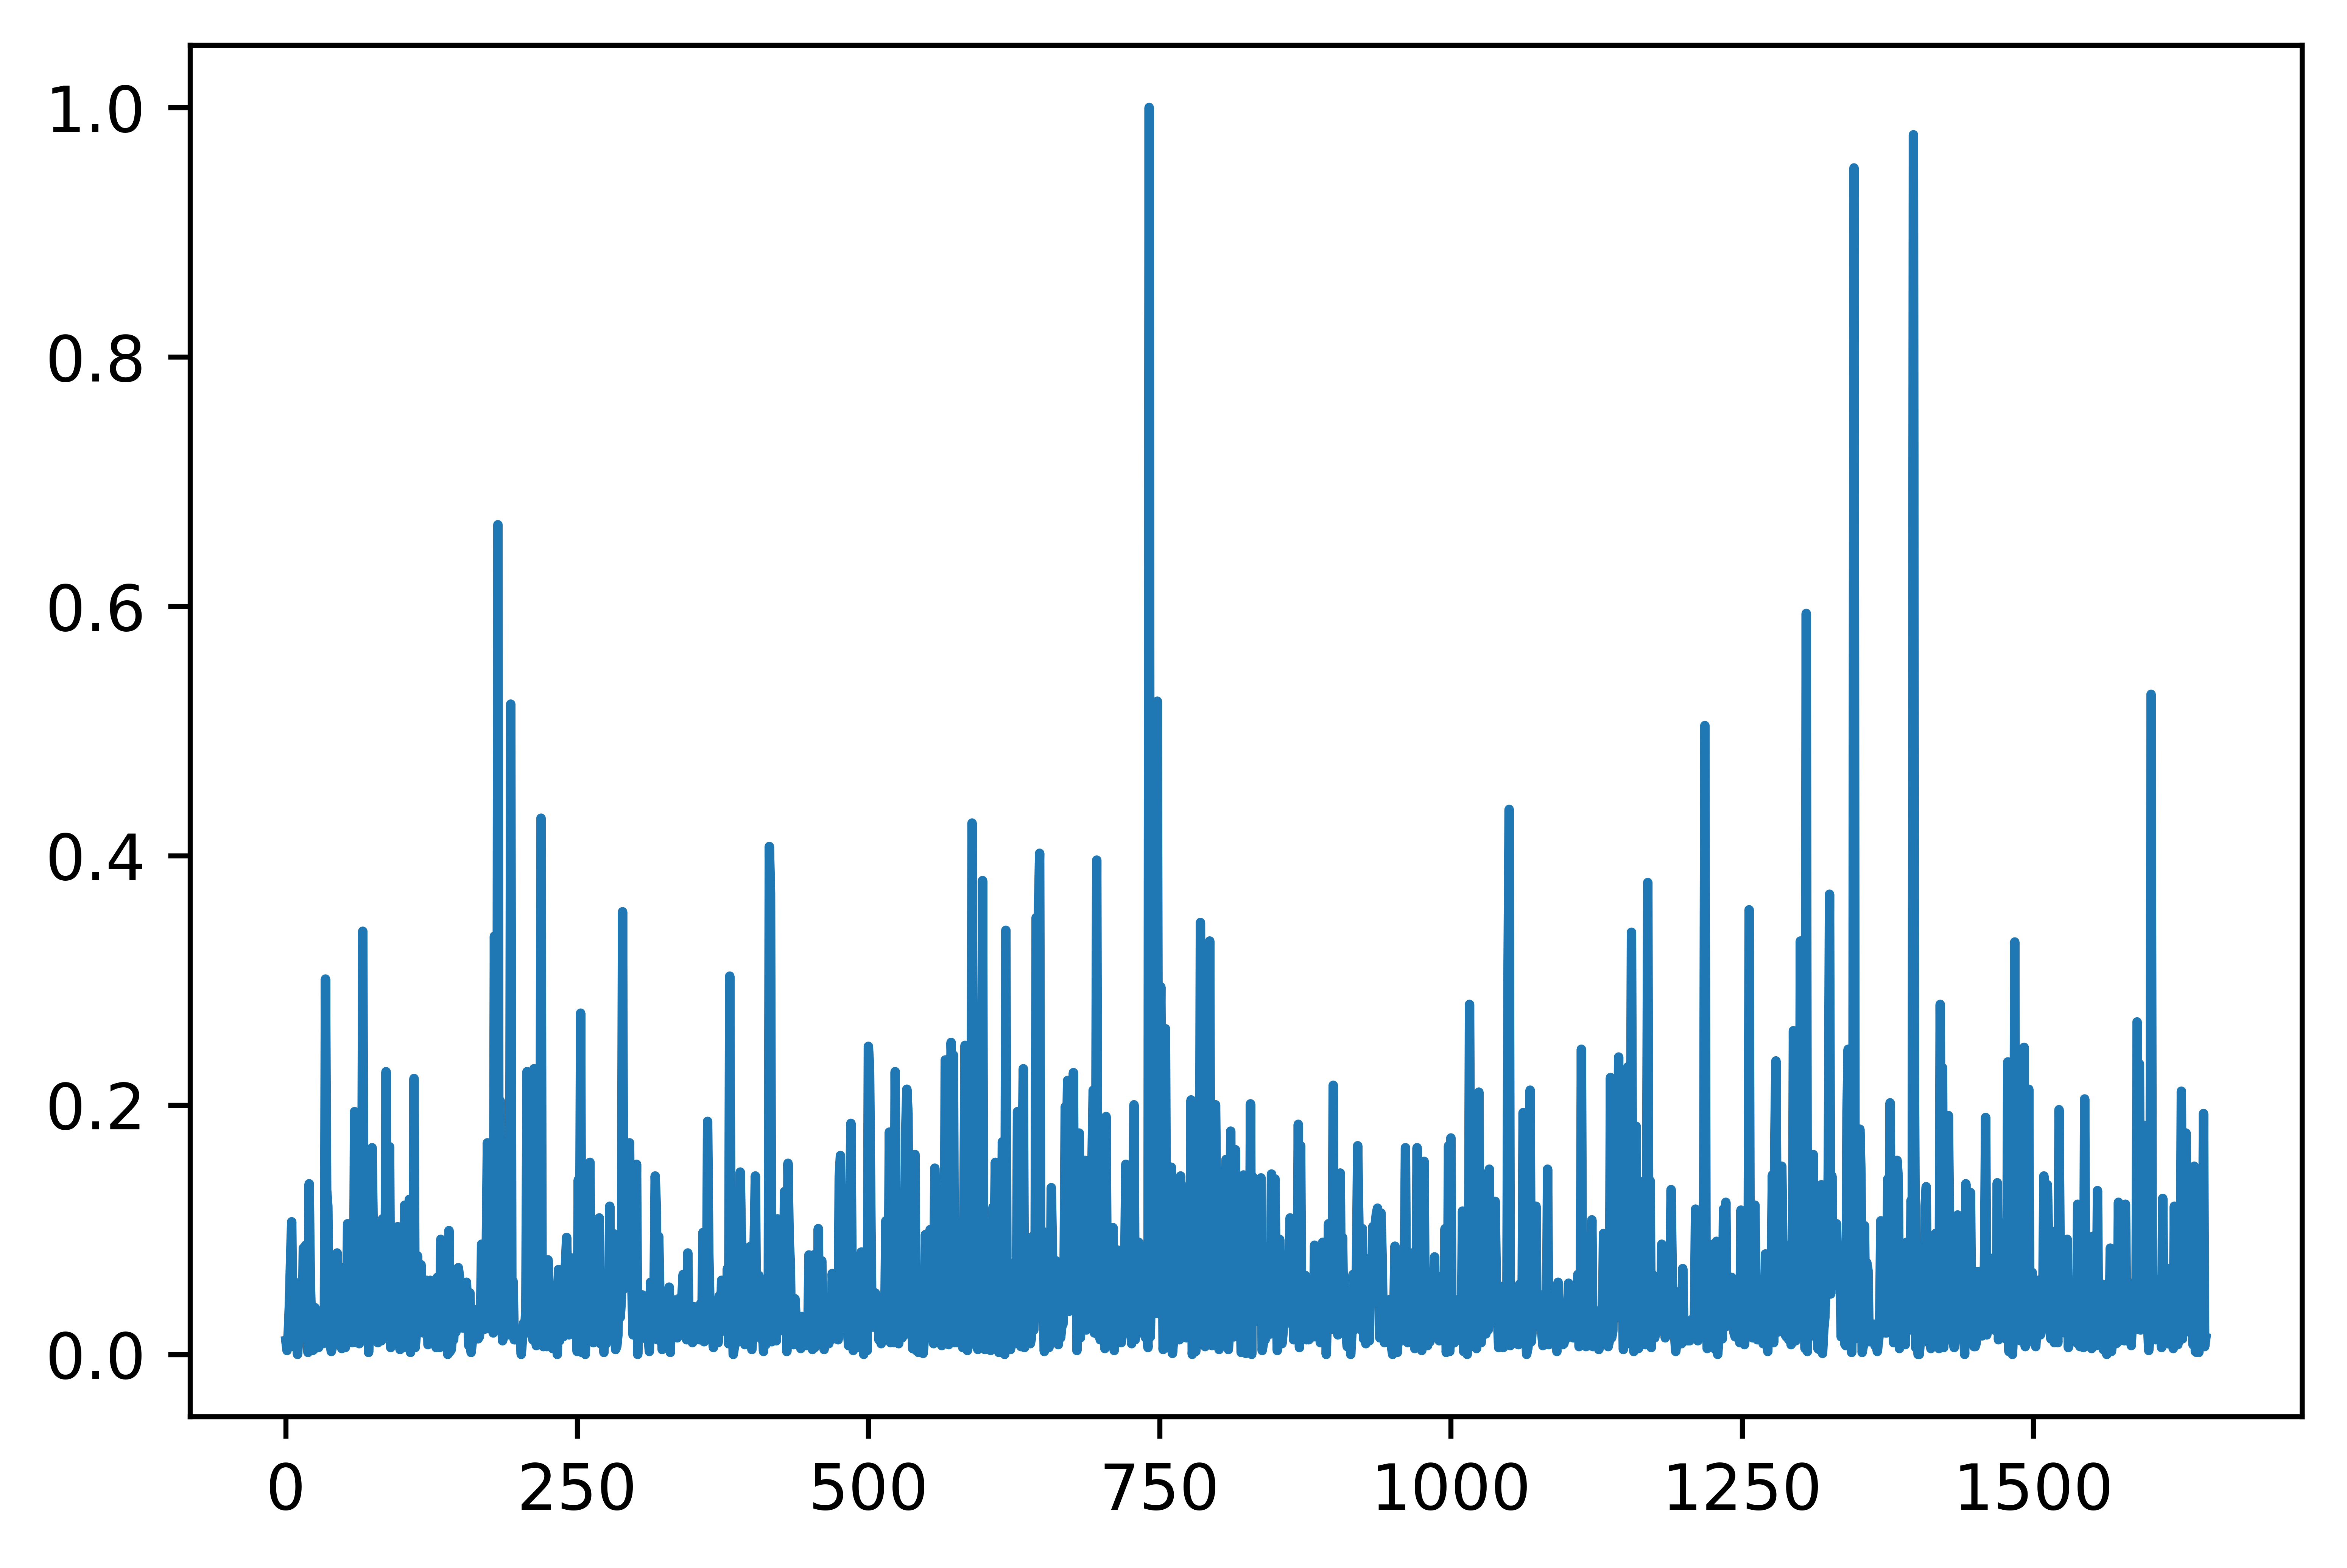

In [63]:
plt.figure(dpi=1200)
plt.plot(Data.EENS)
plt.show()

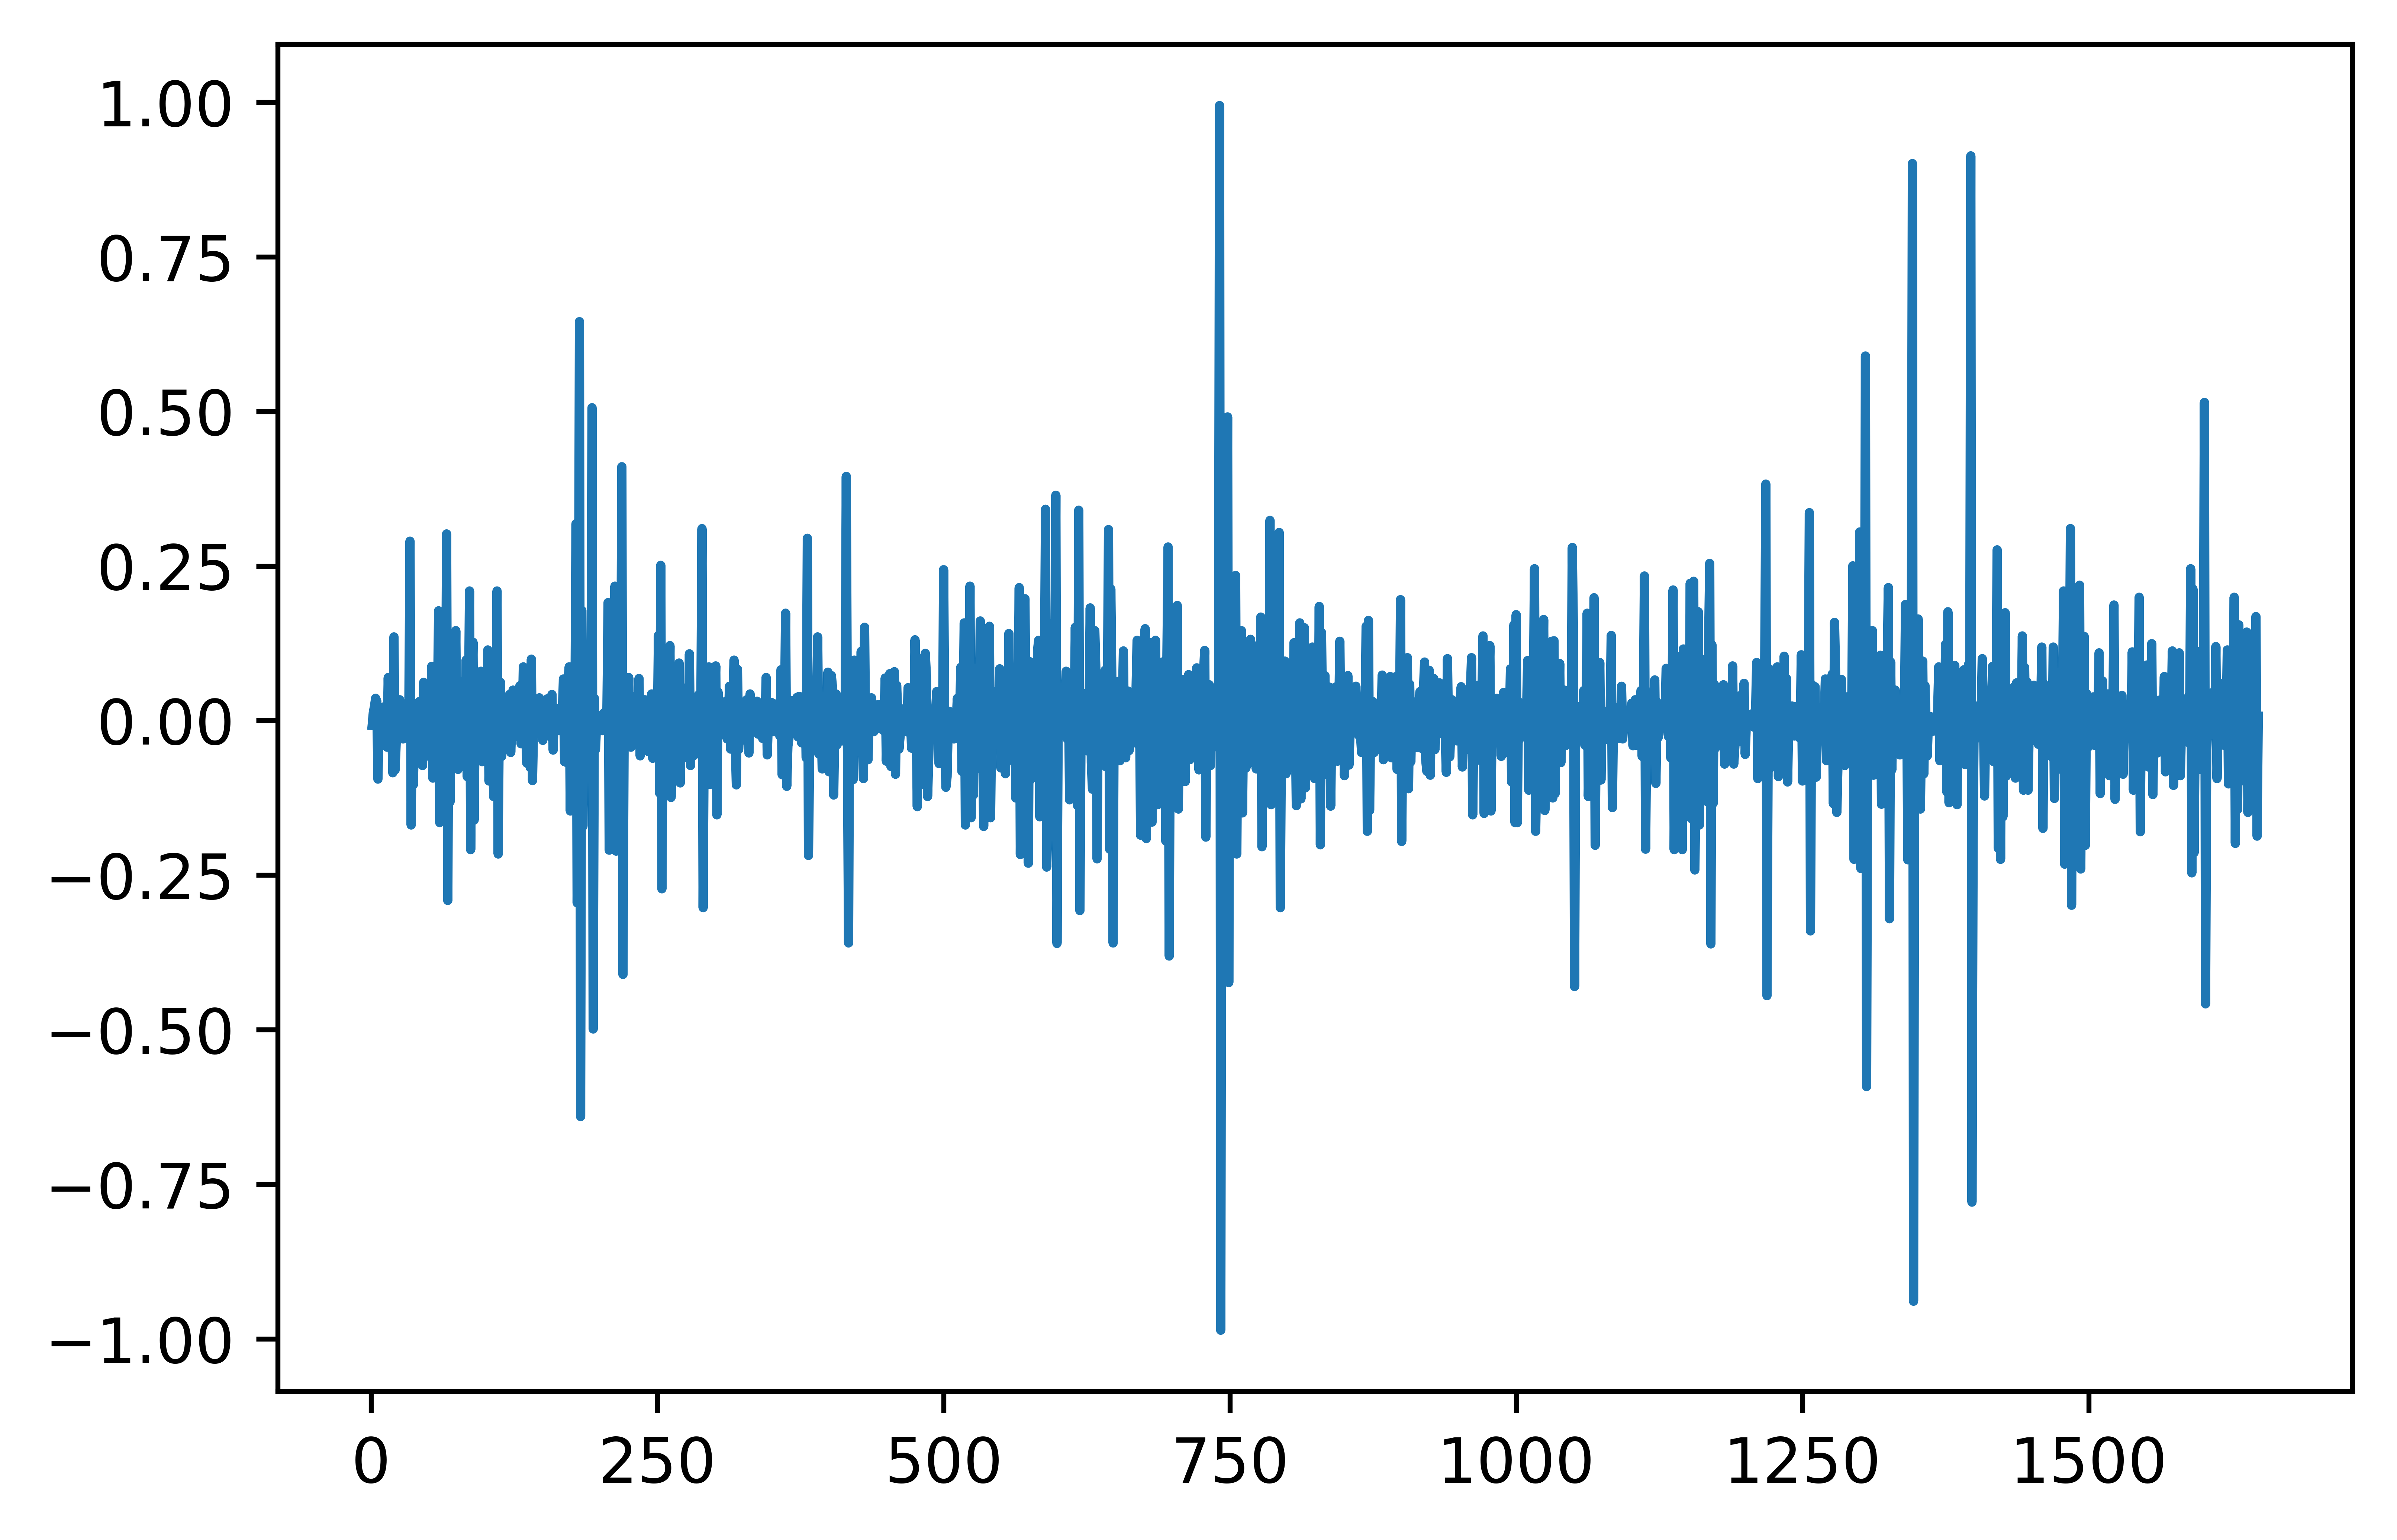

In [74]:
plt.figure(dpi=1200)
plt.plot(Data.EENS.diff())
plt.show()

In [66]:
import numpy as np
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(Data.EENS, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3554.035, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2496.090, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2947.100, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3554.036, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2498.090, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3553.942, Time=1.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3551.433, Time=0.92 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3556.027, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3556.004, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3555.944, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2949.100, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3553.408, Time=0.40 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.696 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1649
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1780.013
Date:                Sun, 14 Mar 2021   AIC                          -3556.027
Time:                        23:52:52   BIC                          -3545.212
Sample:                             0   HQIC                         -3552.017
                               - 1649                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9865      0.004   -223.283      0.000      -0.995      -0.978
sigma2         0.0067   5.65e-05    119.198      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):             84536.42
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             4.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
?pm.auto_arima

## Inspecting goodness of fit
We can look at how well the model fits in-sample data:

In [69]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [70]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([0.        , 0.01094605, 0.00703638, 0.01016492, 0.01740166,
       0.02894592, 0.04186576, 0.03754995, 0.03362534, 0.03292683])

In [71]:
show(plot_arima(Data.EENS, in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

In [75]:
next_25 = stepwise_fit.predict(n_periods=25)
next_25

array([0.05281177, 0.05281177, 0.05281177, 0.05281177, 0.05281177,
       0.05281177, 0.05281177, 0.05281177, 0.05281177, 0.05281177,
       0.05281177, 0.05281177, 0.05281177, 0.05281177, 0.05281177,
       0.05281177, 0.05281177, 0.05281177, 0.05281177, 0.05281177,
       0.05281177, 0.05281177, 0.05281177, 0.05281177, 0.05281177])

In [76]:
# call the plotting func
show(plot_arima(Data.EENS, next_25))